# ■第３週授業前課題

## 【問題1】データセットの取得

In [1]:
#　利用する主なライブラリを宣言
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [51]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 【問題2】データセット自体の調査

エイムズ市の住宅価格データセットは79の説明変数と1つの目的変数から成る。目的変数は「住宅価格」なので、例えば「交通アクセスの良さ」や「屋根のタイプ」など、79の説明変数が、どの程度目的変数に影響を及ぼすかを相関係数行列等を利用して見ていく。

## 【問題3】データの確認

### ▼各特徴量がどういったものかを見る。（数値データか文字データなど）

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

■解答

数値と文字データが入り混じっている。

### ▼今回の目的変数はどの列か確認する

In [53]:
df.columns.get_loc('SalePrice')

80

■解答

Kaggleから「SalePrice」が目的変数だと分かり、80列目に位置している事が調べると分かる

### ▼特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [54]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 【問題4】欠損値への対応

### ▼各特徴量の欠損値の有無を確認する。

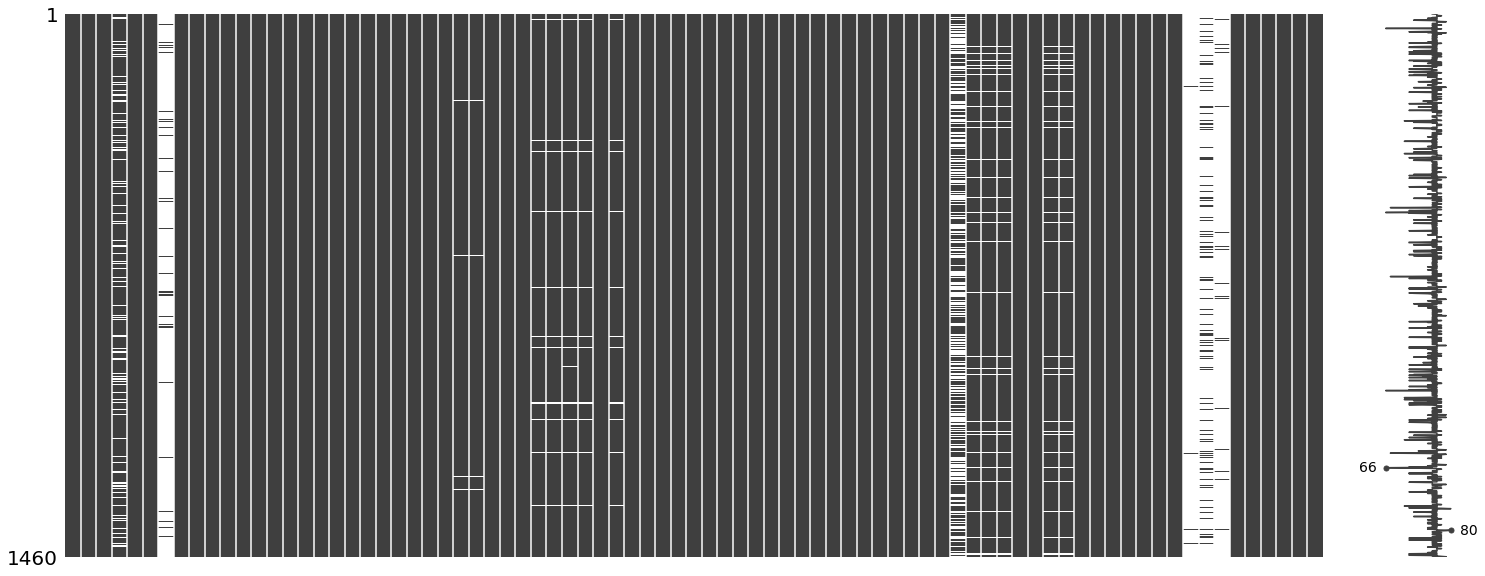

In [55]:
#欠損している場所を把握
msno.matrix(df)

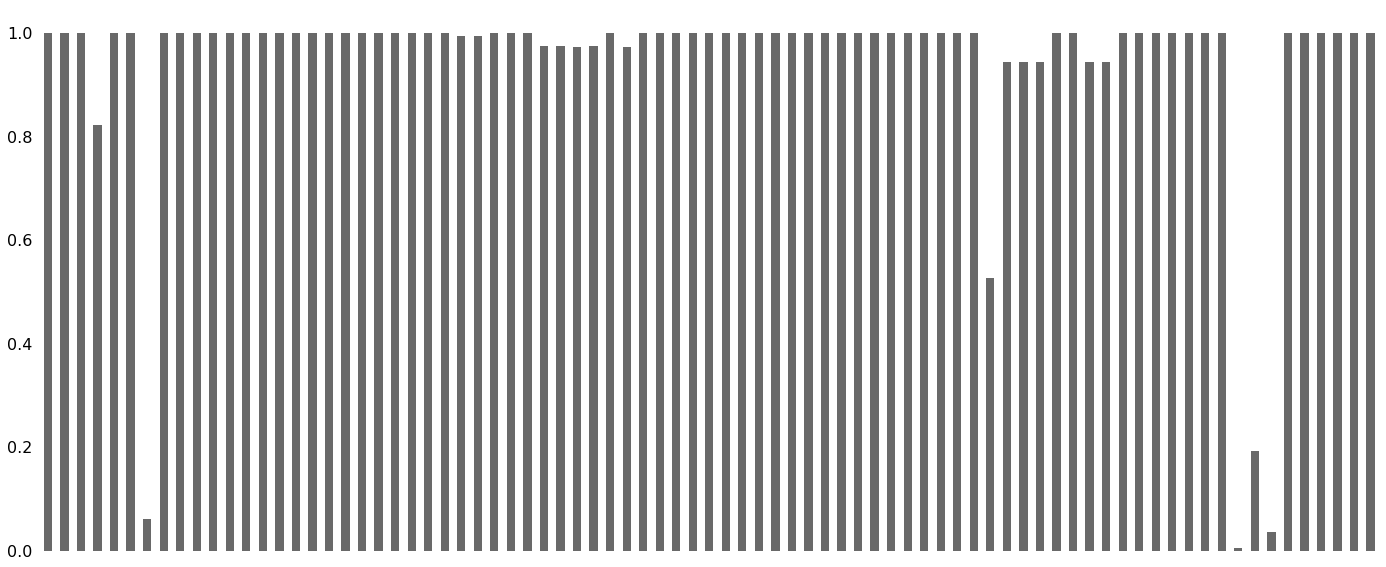

In [56]:
#列ごとの欠損度を棒グラフか
msno.bar(df)

### ▼欠損値が何パーセント含まれるかを確認する。

In [57]:
#欠損値が0%より大きいの列を大きい順に並べる
numbers = len(df)
missing_rate = df.isnull().sum() / numbers*100
missing_rate = missing_rate[missing_rate>0].sort_values(ascending=False)
print("欠損率が０%より大きい列は:\n {}".format(missing_rate))

欠損率が０%より大きい列は:
 PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64


In [58]:
#欠損数が0より大きいの列を大きい順に並べる
missing_number= df.isnull().sum()
missing_number = missing_number[missing_number>0].sort_values(ascending=False)
print("欠損数が０より大きい列は:\n {}".format(missing_number))

欠損数が０より大きい列は:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


In [59]:
#欠損率と欠損数を合わせてDataFrameを作る
df_null = pd.concat([missing_number,missing_rate], axis=1)
df_null = df_null.rename(columns={0:'missing_number',1:'missing_rate'})
df_null

,missing_number,missing_rate
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


### ▼5つ以上欠損値がある特徴量（列）は削除する

In [65]:
#まず5つ以上欠損値がある特徴量のインデックスを取得する
over_five_missing = missing_number[missing_number>=5].index
df_five_delete = df.drop(over_five_missing,axis=1)
df_five_delete

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


### ▼欠損値があるサンプル（行）は削除する。

In [67]:
df_delete_null = df_five_delete.dropna(how='any',axis=0)
df_delete_null

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


## 【問題5】用語の調査

■尖度(せんど)

確率変数の確率密度関数や頻度分布の鋭さを表す数字である。 正規分布と比べて、尖度が大きければ鋭いピークと長く太い裾を持った分布を持ち、尖度が小さければより丸みがかったピークと短く細い尾を持った分布であるという事が判断できる。


■歪度(わいど)

分布の歪み度合いを示すものです。 正規分布のように左右対称であるのか、それとも片方の裾だけだ伸びたような歪んだ分布なのか、その度合いを示します。 これを歪度（または歪度係数）といって、歪度=0は左右対称。歪度が0 よりも大きければ右の裾が長い分布、歪度が0 よりも小さければ左の裾が長い分布となります。

## 【問題6】分布の確認

### ▼seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。

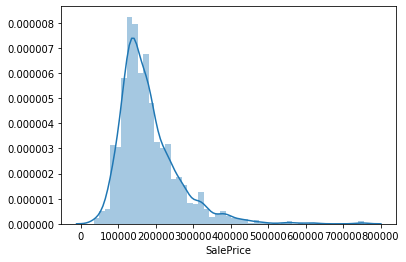

In [69]:
#目的変数の分布
sns.distplot(df['SalePrice'])

In [71]:
#「尖度」と「歪度」を求める
import scipy
#歪度
skew = scipy.stats.skew(df['SalePrice'])
#尖度
kurtosis = scipy.stats.kurtosis(df['SalePrice'])

print("尖度は{:.2f}\n歪度は{:.2f}".format(skew,kurtosis))

尖度は1.88
歪度は6.51


### ▼目的変数に対して対数変換を行う。

In [74]:
df_sale = np.log1p(df['SalePrice'])

### ▼対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

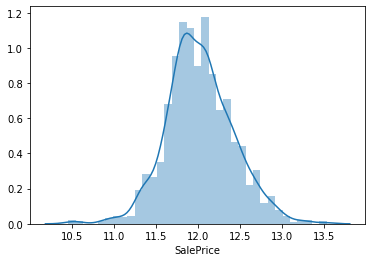

In [76]:
sns.distplot(df_sale)

In [77]:
#歪度
skew = scipy.stats.skew(df_sale)
#尖度
kurtosis = scipy.stats.kurtosis(df_sale)

print("尖度は{:.2f}\n歪度は{:.2f}".format(skew,kurtosis))

尖度は0.12
歪度は0.80


元のデータでは尖度が6.51であったが、対数変換により尖度が0.80となった。分布が正規分布に近くなった。

## 【問題7】相関係数の確認

### ▼相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。

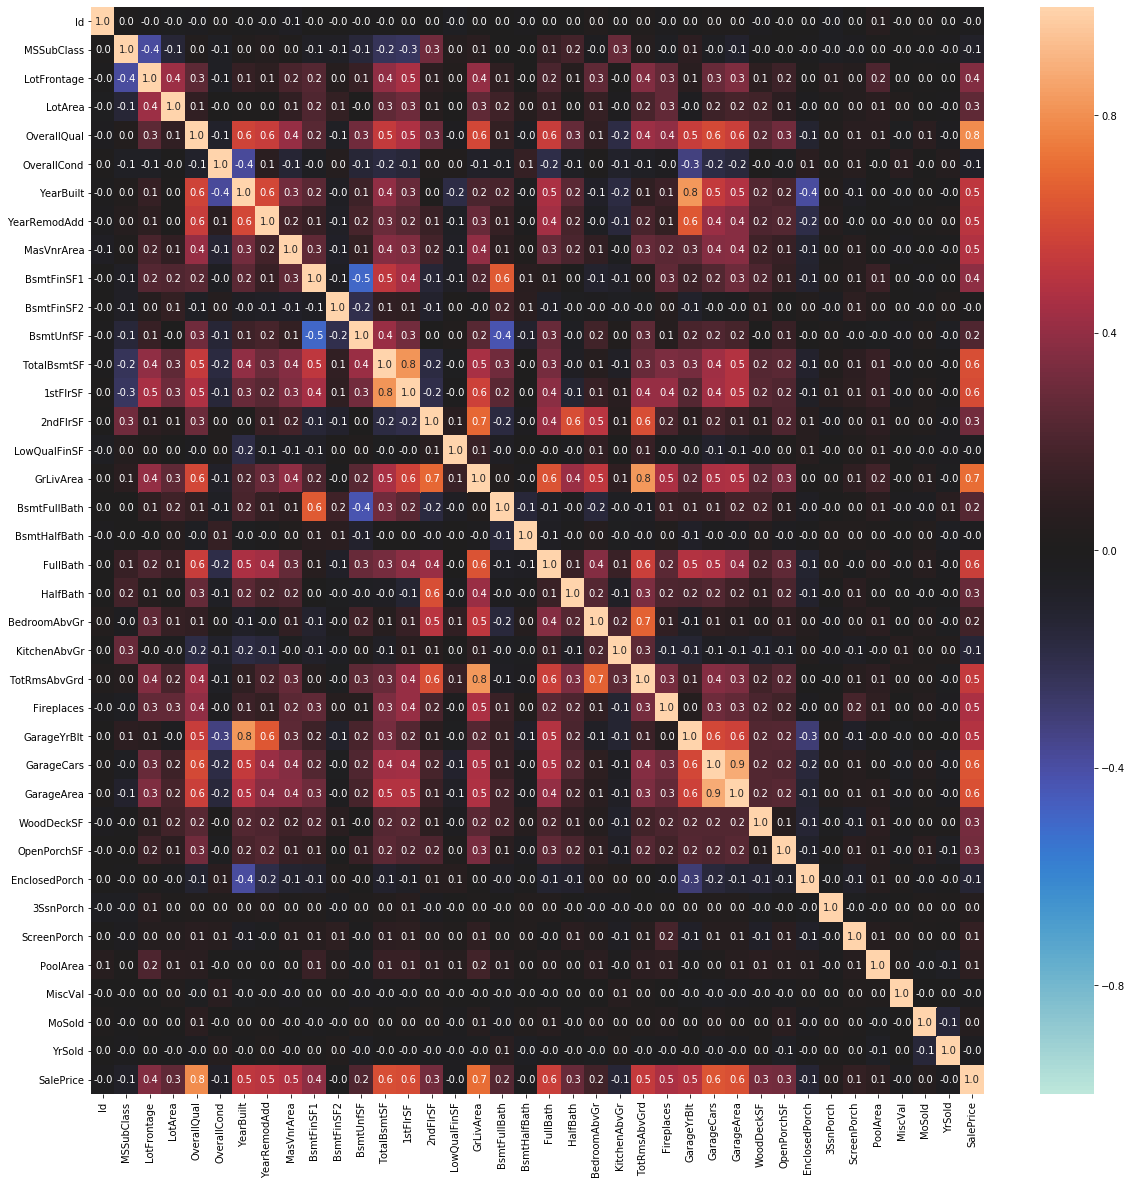

In [85]:
#相関係数行列を作る
df_corr = df.corr()
#相関係数行列のヒートマップを作る

fig = plt.figure(figsize=(20,20))
sns.heatmap(df_corr,#ここに相関数列が入る
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に値を表示
            fmt='.1f',
            xticklabels=df_corr.columns.values,
            yticklabels=df_corr.columns.values
           )
plt.show()

### ▼目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。

In [95]:
#SalePriceの相関系が高い10個を抽出し高い順に並び替え
#df_corrはdfの相関係数行列
df_corr_saleprice = df_corr["SalePrice"].sort_values(ascending=False)
df_corr_saleprice = df_corr_saleprice
df_corr_saleprice.head()

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64

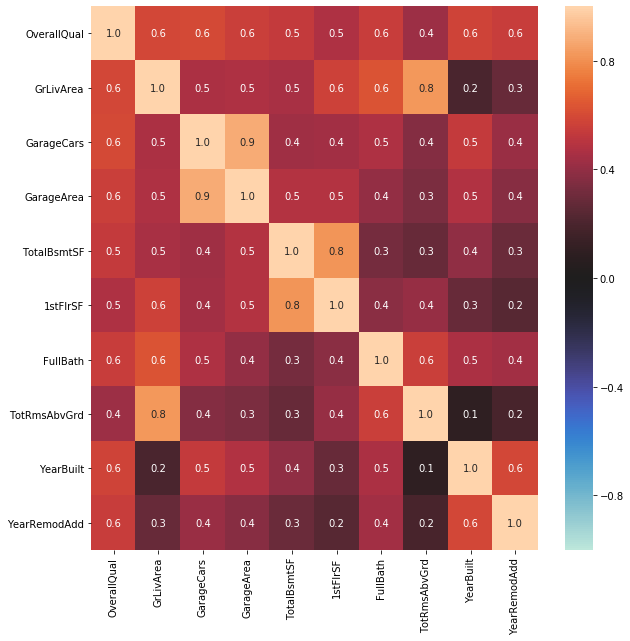

In [106]:
#相関系の高いTOP10をデータフレーム型に変換
df_high_corr_saleprice = df[df_corr_saleprice[1:11].index]
#相関系の高いTOP10の相関係数行列を作成
df_high_corr_saleprice_corr = df_high_corr_saleprice.corr()

fig = plt.figure(figsize=(10,10))
sns.heatmap(df_high_corr_saleprice_corr,#ここに相関数列が入る
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に値を表示
            fmt='.1f',
            xticklabels=df_high_corr_saleprice_corr.columns.values,
            yticklabels=df_high_corr_saleprice_corr.columns.values
           )
plt.show()

### ▼選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。

OverallQual: 家の仕上がり、材料の評価

GrLivArea: リビングの広さ

GarageCars: 車何台分かで見たときの車庫の広さ

GarageArea: 面積で見たときの車庫の広さ

TotalBsmtSF: 敷地内全体の広さ

1stFlrSF: 1階部分の面積

FullBath: 風呂場の総数

TotRmsAbvGrd: 合計部屋数（風呂場を除く）

YearBuilt: 築年数

### ▼選んだ10個の特徴量の中でお互いの相関が高い組み合わせを3つ探し出す

▼GarageCarsとGarageArea
広さを測る尺度の違いはあるにせよ、どちらも車庫の面積を表しているため、高い相関が出るのは当然と言える。


▼GrLivAreaとTotRmsAbvGrd
合計部屋数の多さもリビングルームの広さも別の要因（例えば、家主の経済力）に由来すると考えられるため、これら2つの特徴量間の関係は疑似相関である可能性が高い。


▼TotalBsmtSFと1stFlrSF
通常は建物が敷地内の大半を占め、各階の床面積の中で最大なのは構造上1階であることが多いため、この結果は妥当であると言える。